In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from datetime import timedelta
import seaborn as sns


In [6]:
noreuse = pd.read_csv('noreuse.stage3.csv',
  names=["File", "Condition", "Metric", "Value"])
reuse = pd.read_csv('reuse.stage3.csv', 
                      names=["File", "Condition", "Metric", "Value"])
print("noreuse"); display(noreuse);
print("reuse"); display(reuse);

noreuse


,File,Condition,Metric,Value
0,Init/Prelude.lean,reuse_across_ctor_disabled,rss,151330816
1,Init/Prelude.lean,reuse_across_ctor_disabled,num_alloc,1321786
2,Init/Prelude.lean,reuse_across_ctor_disabled,num_small_alloc,26198906
3,Init/Prelude.lean,reuse_across_ctor_disabled,num_dealloc,1273534
4,Init/Prelude.lean,reuse_across_ctor_disabled,num_small_dealloc,25817637
...,...,...,...,...
28579,./././hello_world.lean,reuse_across_ctor_disabled,num_pages,2179
28580,./././hello_world.lean,reuse_across_ctor_disabled,num_exports,0
28581,./././hello_world.lean,reuse_across_ctor_disabled,num_recycled_pages,358
28582,./././hello_world.lean,reuse_across_ctor_disabled,c_file_size,2345


reuse


,File,Condition,Metric,Value
0,Init/Prelude.lean,reuse_across_ctor_disabled,rss,143773696
1,Init/Prelude.lean,reuse_across_ctor_disabled,num_alloc,1323874
2,Init/Prelude.lean,reuse_across_ctor_disabled,num_small_alloc,26551155
3,Init/Prelude.lean,reuse_across_ctor_disabled,num_dealloc,1275419
4,Init/Prelude.lean,reuse_across_ctor_disabled,num_small_dealloc,26169298
...,...,...,...,...
28629,./././hello_world.lean,reuse_across_ctor_disabled,num_pages,2178
28630,./././hello_world.lean,reuse_across_ctor_disabled,num_exports,0
28631,./././hello_world.lean,reuse_across_ctor_disabled,num_recycled_pages,357
28632,./././hello_world.lean,reuse_across_ctor_disabled,c_file_size,2345


In [7]:
# Filtering the rows where Metric is 'time_elapsed_ms' and then summing the 'Value' column for both DataFrames
sum_time_elapsed_reuse = reuse[reuse["Metric"] == "time_elapsed_ms"]["Value"].sum()
sum_time_elapsed_no_reuse = noreuse[noreuse["Metric"] == "time_elapsed_ms"]["Value"].sum()

sum_time_elapsed_reuse, sum_time_elapsed_no_reuse

# Ensuring the values are in a compatible format for timedelta
time_reuse = timedelta(milliseconds=int(sum_time_elapsed_reuse))
time_no_reuse = timedelta(milliseconds=int(sum_time_elapsed_no_reuse))

# Formatting as hours:minutes:seconds.milliseconds again
time_format_reuse = str(time_reuse)
time_format_no_reuse = str(time_no_reuse)
display(HTML(f"<h3>time (reuse): {time_format_reuse} | time (noreuse): {time_format_no_reuse}</h3>"))

In [8]:
df_merged = pd.merge(reuse, noreuse, on=["File", "Metric"], suffixes=('_reuse', '_no_reuse'))
display(df_merged)

,File,Condition_reuse,Metric,Value_reuse,Condition_no_reuse,Value_no_reuse
0,Init/Prelude.lean,reuse_across_ctor_disabled,rss,143773696,reuse_across_ctor_disabled,151330816
1,Init/Prelude.lean,reuse_across_ctor_disabled,num_alloc,1323874,reuse_across_ctor_disabled,1321786
2,Init/Prelude.lean,reuse_across_ctor_disabled,num_small_alloc,26551155,reuse_across_ctor_disabled,26198906
3,Init/Prelude.lean,reuse_across_ctor_disabled,num_dealloc,1275419,reuse_across_ctor_disabled,1273534
4,Init/Prelude.lean,reuse_across_ctor_disabled,num_small_dealloc,26169298,reuse_across_ctor_disabled,25817637
...,...,...,...,...,...,...
30831,./././hello_world.lean,reuse_across_ctor_disabled,num_pages,2178,reuse_across_ctor_disabled,2179
30832,./././hello_world.lean,reuse_across_ctor_disabled,num_exports,0,reuse_across_ctor_disabled,0
30833,./././hello_world.lean,reuse_across_ctor_disabled,num_recycled_pages,357,reuse_across_ctor_disabled,358
30834,./././hello_world.lean,reuse_across_ctor_disabled,c_file_size,2345,reuse_across_ctor_disabled,2345


,File,Value_reuse,Value_no_reuse,absolute_diff,%Decrease
0,./././Main.lean,207,1824,1617,88.651316
1,./././Main.lean,215,1824,1609,88.212719
2,./././Main.lean,228,1824,1596,87.500000
3,./././Main.lean,241,1824,1583,86.787281
4,./././Main.lean,249,1824,1575,86.348684
...,...,...,...,...,...
2959,./././Main.lean,1587,265,-1322,-498.867925
2960,json.lean,2469,331,-2138,-645.921450
2961,./././Main.lean,1587,208,-1379,-662.980769
2962,./././Main.lean,1587,207,-1380,-666.666667


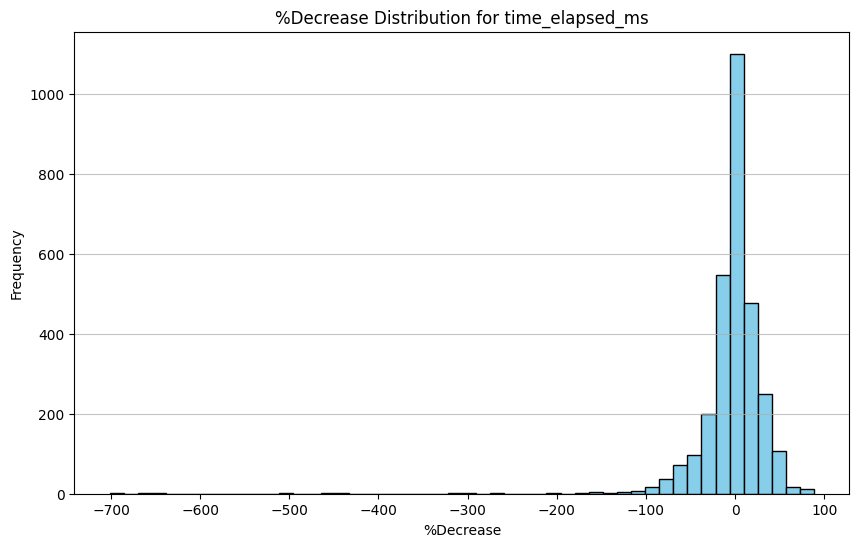

,File,Value_reuse,Value_no_reuse,absolute_diff,%Decrease
0,conv1.lean,129306624,506945536,377638912,74.492995
1,match1.lean,135217152,516243456,381026304,73.807484
2,./././Main.lean,134098944,511733760,377634816,73.795173
3,./././Main.lean,134270976,511733760,377462784,73.761556
4,./././Main.lean,134668288,511733760,377065472,73.683916
...,...,...,...,...,...
2959,./././Main.lean,506310656,139735040,-366575616,-262.336216
2960,./././Main.lean,506310656,139472896,-366837760,-263.017239
2961,./././Main.lean,506310656,139374592,-366936064,-263.273283
2962,./././Main.lean,506310656,138948608,-367362048,-264.386994


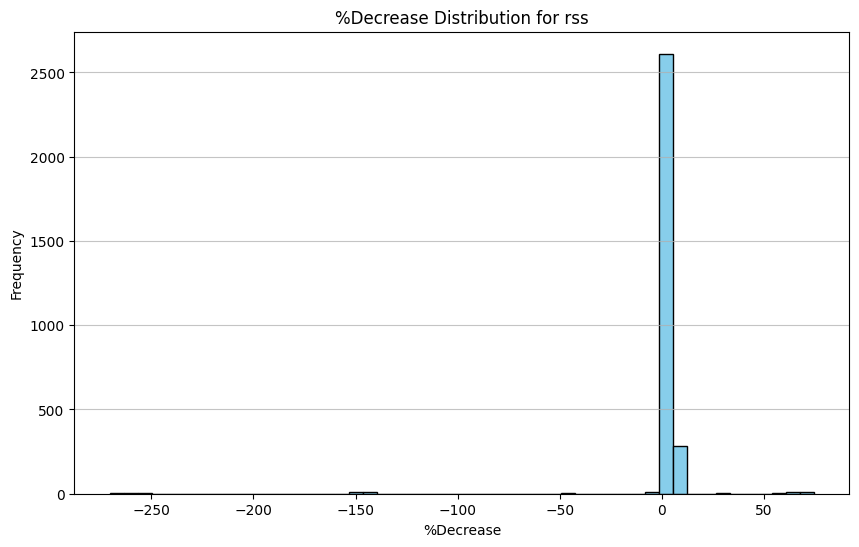

,File,Value_reuse,Value_no_reuse,absolute_diff,%Decrease
0,json.lean,1310789,7613625,6302836,82.783641
1,root.lean,1011715,4038440,3026725,74.947876
2,./././Main.lean,995189,3414636,2419447,70.855195
3,./././Main.lean,1010320,3414636,2404316,70.412073
4,./././Main.lean,1010582,3414636,2404054,70.404400
...,...,...,...,...,...
2959,./././Main.lean,3424776,1006225,-2418551,-240.358866
2960,./././Main.lean,3424776,1005962,-2418814,-240.447850
2961,./././Main.lean,3424776,991233,-2433543,-245.506657
2962,root.lean,4065803,1007071,-3058732,-303.725557


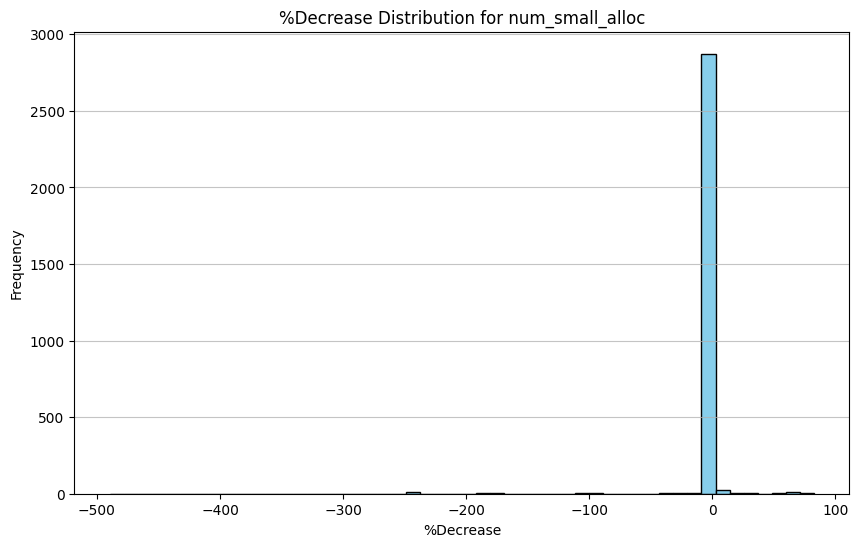

,File,Value_reuse,Value_no_reuse,absolute_diff,%Decrease
0,json.lean,45090,268253,223163,83.191241
1,./././UserAttr/Tst.lean,56027,288971,232944,80.611549
2,./././UserAttr/Tst.lean,56241,288971,232730,80.537493
3,root.lean,31071,143169,112098,78.297676
4,derivingHashable.lean,32201,101883,69682,68.394138
...,...,...,...,...,...
2959,derivingHashable.lean,102129,32201,-69928,-217.160958
2960,root.lean,143169,31071,-112098,-360.780149
2961,./././UserAttr/Tst.lean,289682,56234,-233448,-415.136750
2962,./././UserAttr/Tst.lean,289682,56020,-233662,-417.104605


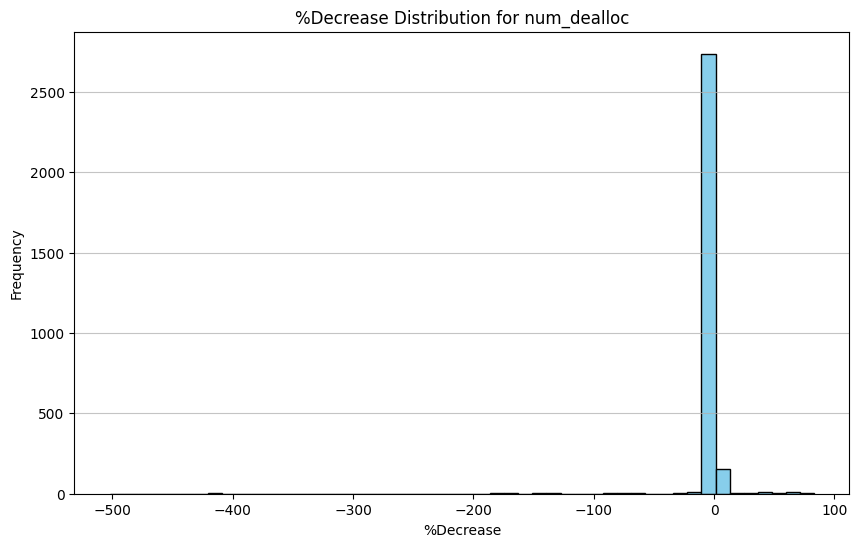

,File,Value_reuse,Value_no_reuse,absolute_diff,%Decrease
0,json.lean,920254,6592724,5672470,86.041369
1,root.lean,641398,3663512,3022114,82.492264
2,./././UserAttr/Tst.lean,1727311,6828034,5100723,74.702660
3,./././UserAttr/Tst.lean,1727759,6828034,5100275,74.696098
4,./././Main.lean,624896,2403122,1778226,73.996493
...,...,...,...,...,...
2959,splitIssue.lean,3572502,916821,-2655681,-289.661886
2960,./././UserAttr/Tst.lean,6878782,1722958,-5155824,-299.242582
2961,./././UserAttr/Tst.lean,6878782,1722507,-5156275,-299.347114
2962,root.lean,3690854,636775,-3054079,-479.616662


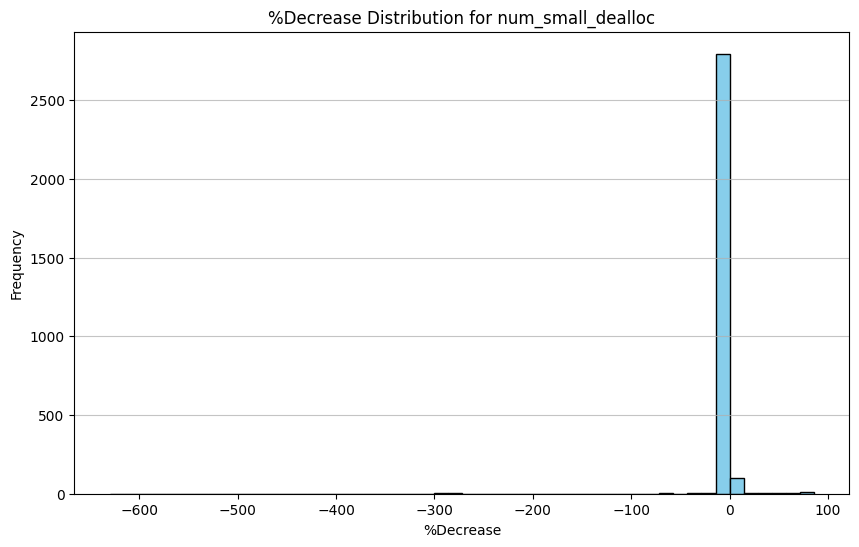

,File,Value_reuse,Value_no_reuse,absolute_diff,%Decrease
0,./././UserAttr/Tst.lean,2021,49905,47884,95.950306
1,./././UserAttr/Tst.lean,2021,49905,47884,95.950306
2,./././UserAttr.lean,1140,11603,10463,90.174955
3,./././UserAttr/BlaAttr.lean,6104,45542,39438,86.596987
4,./././Main.lean,3413,18160,14747,81.205947
...,...,...,...,...,...
1191,./././UserAttr/Tst.lean,49458,2021,-47437,-2347.204354
1192,./././UserAttr/Tst.lean,49458,2021,-47437,-2347.204354
1193,./././Prv.lean,0,0,0,NaN
1194,./././TestExtern.lean,0,0,0,NaN


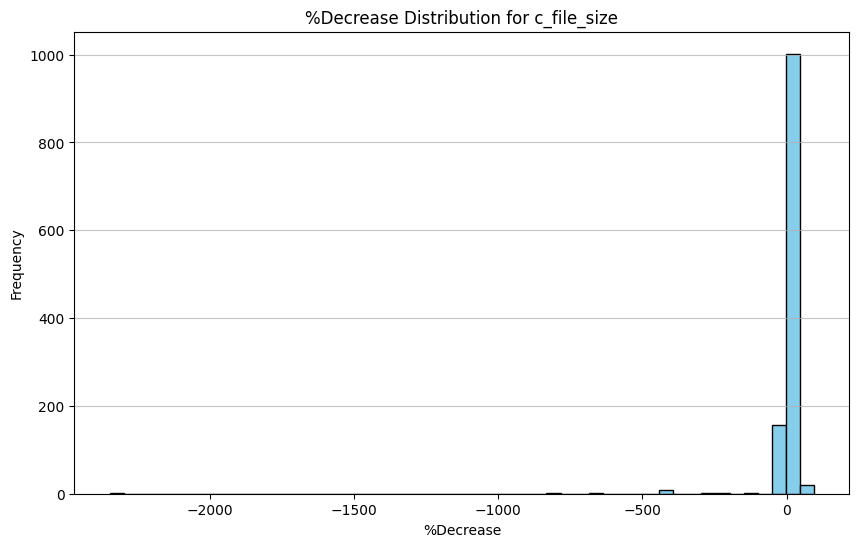

In [12]:
# metrics for which we should compute decreases
df_corr = pd.DataFrame(df_merged["File"].unique(), columns=["File"]) 

for metric in ["time_elapsed_ms", "rss", "num_small_alloc", "num_dealloc", "num_small_dealloc", "c_file_size"]:
  display(HTML(f"<h1>{metric}</h1>"))
  df_metric = df_merged[df_merged["Metric"] == metric].copy()
  df_metric["absolute_diff"] = df_merged["Value_no_reuse"] - df_merged["Value_reuse"]
  df_metric["%Decrease"] = (
    100.0 * (df_merged["Value_no_reuse"] - df_merged["Value_reuse"]) / df_merged["Value_no_reuse"]
  )
  df_metric = df_metric.drop(["Condition_reuse", "Condition_no_reuse", "Metric"], axis=1)

  df_kv = df_metric[["File", "%Decrease"]].copy()
  df_kv.rename(columns={"%Decrease": metric}, inplace=True)
  # df_corr = pd.merge(df_corr, df_kv, on="File", how="outer")
  
  # Sorting by maximum decrease
  df_metric_sorted = df_metric.sort_values(by="%Decrease", ascending=False)
  df_metric_sorted.reset_index(drop=True, inplace=True) # changes index to start from zero.
  display(df_metric_sorted)
  plt.figure(figsize=(10, 6))
  plt.hist(df_metric_sorted['%Decrease'], bins=50, color='skyblue', edgecolor='black')
  plt.title(f'%Decrease Distribution for {metric}')
  plt.xlabel('%Decrease')
  plt.ylabel('Frequency')
  plt.grid(axis='y', alpha=0.75)
  plt.show()

# corr = df_corr.drop('File', axis=1).corr()  # Assuming df_corr is defined and populated
# plt.figure(figsize=(12,8))
# sns.heatmap(corr, cmap="Greens",annot=True)


In [ ]:
df_full = None

# for each file, grab num alloc and time elapsed.
variant2df = { "reuse" : reuse, "noreuse": noreuse }
for (variant, df) in variant2df.items():
    metric2df = {}
    for metric in ["time_elapsed_ms", "num_alloc"]:
      out = df[df["Metric"] == metric].copy()
      out = out[["File", "Value"]]
      out.rename(columns={"Value" : metric}, inplace=True)
      out = out[["File", metric]].set_index("File")
      metric2df[metric] = out
    
    df_metrics_merged = metric2df["time_elapsed_ms"].join(metric2df["num_alloc"])
    df_metrics_merged = df_metrics_merged.sort_values(by='time_elapsed_ms', ascending=False)

    display(HTML(f"<h3>Correlation: Time elapsed v/s # allocations ({variant})</h3>"))
    display(df_metrics_merged)
    corr = df_metrics_merged.corr()  # Assuming df_corr is defined and populated
    plt.figure(figsize=(4,2))
    sns.heatmap(corr, cmap="Greens",annot=True)
    plt.title(f"Correlation: Time Elapsed v/s # Allocations ({variant})")
    plt.show()

    
    if df_full is None:
        df_full = df_metrics_merged
    else:
        df_full = pd.concat([df_full, df_metrics_merged])

df_full = df_full.sort_values(by='time_elapsed_ms', ascending=False)
display(df_full)
corr = df_full.corr() 
plt.figure(figsize=(4,2))
sns.heatmap(corr, cmap="Greens",annot=True)
plt.title('Correlation: Time Elapsed v/s # Allocations (Aggregate reuse + no reuse)')
plt.show()


In [ ]:
def print_file_info(name):
    for reuses in ["reuse", "no_reuse"]: